<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/Unidade5_Interpola%C3%A7%C3%A3o_por_Partes_CN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aproximação de funções: Interpolação



Nesta unidade, vamos estudar métodos para aproximar funções e dados tabelados. Veremos duas maneiras de aproximar funções: o Método dos Mínimos Quadrados e a Interpolação polinomial. A seguir, apresentamos alguns exemplos de resolução em Python. Vamos utilizar as bibliotecas numpy e scipy. Nas aulas anteriores estudamos três formas de se obter um polinômio interpolador:

1.  Resolvendo um sistema linear.
2.  Fórmula de Lagrange.
3.  Forma de Newton (Diferenças Divididas).

[aulas anteriores](https://github.com/pccalegari/exemplos-CN/blob/main/Unidade5_Interpola%C3%A7%C3%A3o_CN.ipynb)

**Exemplo (Fenômeno de Runge):**

Seja
$f(x)=\dfrac{1}{1+x^2},x\in(−4,4)$

Para $n$ inteiro, $p_n(x)$ é o polinômio interpolador de $f(x)$ nos pontos igualmente espaçados $x_0,x_1,\ldots,x_n$, dados por $x_i=−4+i⋅h$ e $h=8/n$. O que acontece se aumentarmos o valor de $n$?

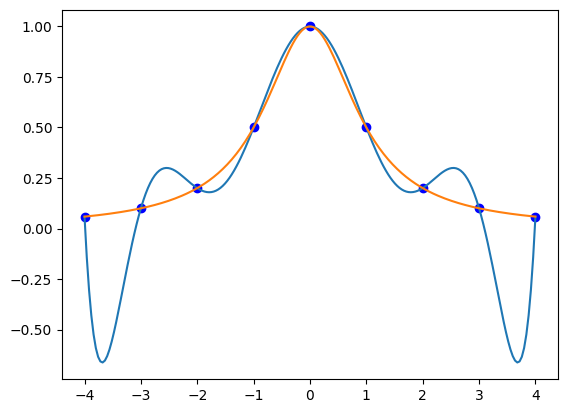

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/(1+x**2)

def p(x,a):
    soma = a[0]
    for i in range(1,len(a)):
        soma += a[i]*x**i
    return soma

a = -4
b = 4
N = 9
x = np.linspace(a,b, N)
y = f(x)

M = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        M[i][j] = x[i]**j
c = np.linalg.solve(M,y)

xx = np.linspace(a,b,200)
yy = p(xx, c)
plt.plot(x,y,'bo')
plt.plot(xx,yy)
plt.plot(xx,f(xx))
plt.show()

**Interpolação por linear partes**

Uma alternativa eficiente que consiste em dividir o intervalo em subintervalos e construir polinômios interpoladores em cada subintervalo. Na interpolação linear por partes em cada subintervalo temos uma reta. A desvantagem é que a função aproximadora não é derivável.



**Exemplo (Interpolação linear por partes):**

Considere $$f(x)=\dfrac{1}{1+x^2}, x\in(-4,4)$$
em $n+1$ pontos igualmente espaçados, $x_0,x_1,\ldots,x_n$, dados por $x_i=-4 + i\cdot h$ e $h = 8/n$. Considere a tabela $(x_i, f(x_i))$ e obtenha a interpolação linear por partes para esta tabela de dados.


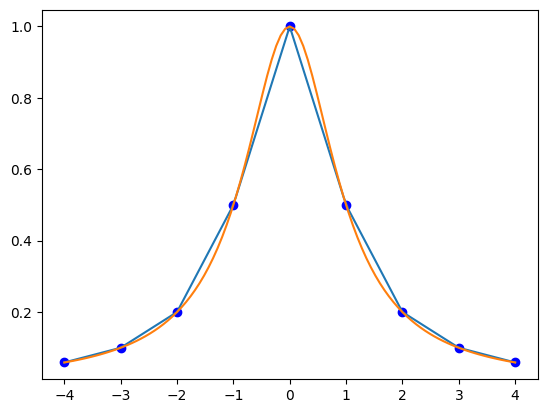

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1/(1+x**2)

a = -4
b = 4
N = 9
x = np.linspace(a,b, N)
y = f(x)

xx = np.linspace(a,b,101)
yl = np.interp(xx,x,y)

plt.plot(x,y,'bo')
plt.plot(xx,yl)
plt.plot(xx,f(xx))



**Splines**

Uma propriedade importante dos polinômios é que conseguimos calcular integrais e derivadas facilmente. Entretanto na interpolação linear por partes perdemos esta propriedade. A técnica de interpolação via splines consiste em interpolar cada subintervalo e obter junções  entre os interpoladores da forma mais suave possível.

As funções *spline*  estão associadas a uma partição de um intervalo $[a,b]$. Uma partição $P$ será definida pelos pontos : $x_0, x_1,\ldots,x_n$, tais que $P:a=x_0 < x_1 < \ldots < x_n=b$. Em cada  subintervalo $(x_{i-1},x_i), i=1,2,\ldots,n$ os splines são polinômios. Para que consigamos as junções mais suaves precisamos impor algumas restrições.

*Definição:*  Uma função $s(x)$ é chamada spline de grau $n$, associada a uma partição $P$ de $[a,b]$ se:

> (i) $s(x)$ é um polinômio de grau $n$ em cada subintervalo $(x_{i-1},x_i)$ .


> (ii) $s(x)$ tem $(n-1)$ derivadas contínuas em cada $x_i$, isto é, $s(x)$ é uma função com $n-1$ derivadas em $(a,b)$.

O termo *spline* se refere a um instrumento de desenho, uma régua flexível que fixada em alguns pontos se encurvava na posição de mínima energia. Pode-se mostrar que essa curvatura de mínima energia é um spline cúbico.

*O conjunto dos splines de grau n, associado a uma partição forma um espaço vetorial.*

**Bases:**

Se $\{\phi_i(x)\}|_{i=1}^k$ é uma base para o espaço vetorial de splines então qualquer elemento deste espaço pode ser escrito na forma:

$$s(x)=c_1\phi_1(x)+c_2\phi_2(x)+\ldots+c_k\phi_k(x),$$

onde $c_1,c_2,\ldots,c_k$ são os coeficientes da combinação linear e $k$ e a dimensão do espaço vetorial.

A base para os splines lineares é dada por:

$$l_i(x)=\left\{\begin{array}{cc}
\dfrac{x-x_{i-1}}{x_i-x_{i-1}}, & \mbox{ se } x_{i-1}\le x \le x_i\\ \\
\dfrac{x_{i+1}-x}{x_{i+1}-x_{i}}, & \mbox{ se } x_{i}\le x \le x_{i+1}\\ \\
0, & \mbox{ se } x > x_{i+1} \mbox{ ou } x < x_{i-1}
\end{array}\right .$$

Na interpolação por partes da função $f(x)$ nos pontos $x_i, i=0,1,2,\ldots,n$, de uma partição $P$, queremos determinar os coeficientes $a_i$ tais que

$$s_1(x) = \sum_{i=0}^na_il_i(x) \mbox{ e } s_1(x_j) = f(x_j)=y_j, \mbox{ com } j=0,1,\ldots, n.$$

Temos que $l_i(x_j) = 0$ se $i\ne j$ e $l_i(x_i)=1$. Assim, $s_1(x_i) = a_i = y_j$. Portanto, $$s_1(x) = \sum_{i=0}^ny_il_i(x).$$

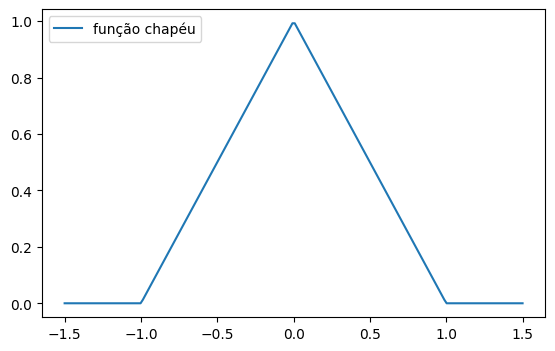

In [ ]:
# função base spline linear
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
#from sp.interpolate import LinearSpline

def l(x, a, b, c):
    y = 0
    if x > a and x <= b:
        y = (x - a)/(b - a)
    if x > b and x < c:
        y = (c - x)/(c - b)
    return y

x = np.arange(10)

a = -1
b = 0
c = 1
x = np.linspace(-1.5,1.5,200)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = l(x[i],a,b,c)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, '-', label ='função chapéu')
ax.legend(loc='upper left', ncol=2)
plt.show()

**Exemplo:** Determine o spline linear para $f(x)=\dfrac{1}{1+x^2},x\in(−4,4)$, nos pontos igualmente espaçados $x_0,x_1,\ldots,x_n$, com $n=5$, dados por $x_i=−4+i⋅h$ e $h=8/n$.

**Spline Cúbico**

A base é composta de funções $B_i(x)$ (sinos) com vértice em $x_i$. Em uma partição igualmente espaçada, ou seja, $h=x_i-x_{i-1}$ para todo $i=1,2,\ldots,n$, temos

$$B_i(x)=\dfrac{1}{h^3}\left\{\begin{array}{ll}
(x-x_{i-2})^3, & \mbox{ se } x_{i-2}\le x \le x_{i-1} \\
h^3+3h^2(x-x_{i-1})+3h(x-x_{i-1})^2-3(x-x_{i-1})^3, & \mbox{ se } x_{i-1}\le x \le x_{i}\\
h^3+3h^2(x_{i+1}-x)+3h(x_{i+1}-x)^2-3(x_{i+1}-x)^3, & \mbox{ se } x_i\le x \le x_{i+1}\\
(x_{i+2}-x)^3, &\mbox{ se } x_{i+1}\le x \le x_{i+2} \\
0, & \mbox{ se } x > x_{i+2} \mbox{ ou } x < x_{i-2}
\end{array}\right .$$
No caso da interpolação por splines cúbicos, queremos determinar os coeficientes $a_i$ tais que:

$$s_3(x) = \sum_{i=-1}^{n+1} a_iB_i(x) \mbox{ e } s_3(x_j)=y_j, j=0,1,\ldots,n,$$
onde $B_i$ é a base de splines cúbicos. A tabela a seguir apresenta os valores de $B_i(x)$ e de suas derivadas nos pontos $x_{i-2}, x_{i-1},x_i,x_{i+1}$ e $x_{i+2}$.

$$\begin{array}{|c|c|c|c|c|c|}
\hline
 & x_{i-2} & x_{i-1} & x_i & x_{i+1} & x_{i+2} \\
\hline
B_i & 0 & 1 & 4 & 1 & 0 \\
\hline
B'_i & 0 & 3/h & 0 & -3/h & 0\\
\hline
B''_i & 0 & 6/h^2 & -12/h^2 & 6/h^2 & 0 \\
\hline
\end{array}$$

Assim, para cada $x_j$, os únicos valores diferentes de zero são $B_{j-1}(x_j)$, $B_{j}(x_j)$ e $B_{j+1}(x_j)$. A condição de interpolação resulta no sistema de equações:

$$s_3(x_j) = a_{j-1}B_{j-1}(x_j) + a_jB_j(x_j) + a_{j+1}B_{j+1}(x_j) = f(x_j) = y_j,$$

$$a_{j-1}+4a_j+a_{j+1} = y_j$$

Teremos um sistema de equações com $n+1$ equações e $n+3$ incógnitas. São necessárias condições adicionais. Em geral, condições impostas nos extremos, como: $s'_3(x_0) = f'(x_0)$ e $s'_3(x_n)=f'(x_n)$ ou $s''_3(x_0)=0$ e $s''_3(x_n)=0$.

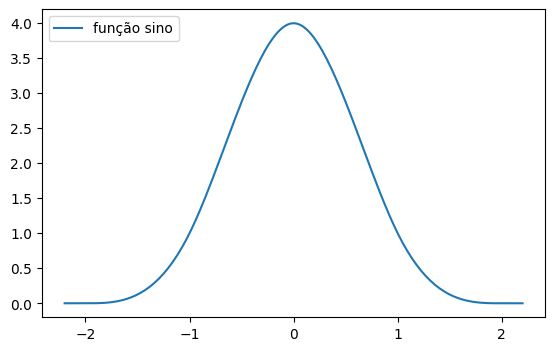

In [ ]:
# função base spline cúbica

def B(x, a):
    y = 0
    h = a[1]-a[0]
    if x > a[0] and x < a[1]:
        y = (x - a[0])**3
    if x > a[1] and x < a[2]:
        y = h**3+3*h**2*(x-a[1])+3*h*(x-a[1])**2-3*(x-a[1])**3
    if x > a[2] and x < a[3]:
        y = h**3+3*h**2*(a[3]-x)+3*h*(a[3]-x)**2-3*(a[3]-x)**3
    if x > a[3] and x < a[4]:
        y = (a[4]-x)**3
    return (1/h**3)*y

a = [-2, -1, 0, 1, 2]
x = np.linspace(-2.2,2.2,200)
y = np.zeros(len(x))
for i in range(len(x)):
    y[i] = B(x[i],a)
fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(x, y, '-', label ='função sino')
ax.legend(loc='upper left', ncol=2)
plt.show()

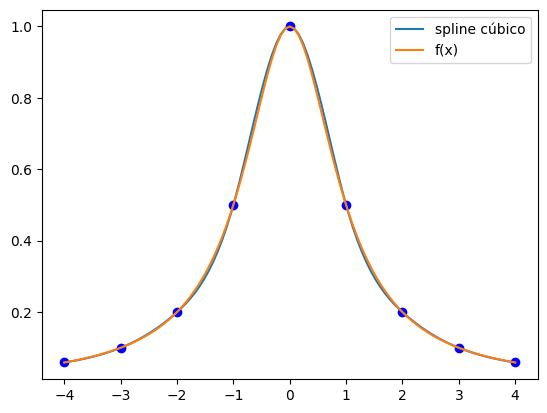

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

def f(x):
    return 1/(1+x**2)

a = -4
b = 4
N = 9
x = np.linspace(a,b, N)
y = f(x)

xx = np.linspace(a,b,101)
sc = sp.interpolate.CubicSpline(x,y)

plt.plot(x,y,'bo')
plt.plot(xx,sc(xx),label='spline cúbico')
plt.plot(xx,f(xx),label='f(x)')
plt.legend()
plt.show()